# Diret Sampling


In [1]:
import matplotlib.pyplot as plt

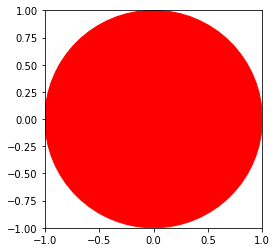

In [2]:
circle1 = plt.Circle((0, 0), 1.0, color='r')

fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
# (or if you have an existing figure)
# fig = plt.gcf()
# ax = fig.gca()
ax.set_xlim((-1, 1))
ax.set_ylim((-1, 1))
ax.set_aspect('equal')
ax.add_artist(circle1)

Throw pebbles into the square. Inside the square is a trial. Inside the circle is a hit.
<p/>
$ A_{square} = 4 $
<p/>
$ A_{circle} = \pi r^2 = \pi $
<p/>
$ A_{circle} / A_{square} = \pi / 4 $
<p/>
Now imagine we have several trails. For example 3156 hits out of 4000 trials. As $N$ increases, the value of $4 \times N_{hits} / N_{trials}$ will get closer and closer to $\pi.$
<p/>
$ 4 \times N_{hits} / N_{trials} = 3.156 \approx \pi $
<p/>
In the limit of an infinite number of trials the resilt will be $ \pi $
<p/>
$ \displaystyle \lim_{N \to \infty} \frac {4 \times N_{hits}} {N_{trials}} = \pi $



In [3]:
# direct_pi.py
import random
n_trials = 64000
n_hits = 0
for iter in range(n_trials):
    x,y = random.uniform(-1.0,1.0), random.uniform(-1.0,1.0)
    if x**2 + y**2 < 1.0:
        n_hits += 1

print("Ans: %s" % (4.0 * n_hits / float(n_trials)))



Ans: 3.1435


# 3x3 Pebble Game (Detailed Balance)


<img style="float:right" src="3x3Pebbles.png"/>
<b>Gobal Balance Condition (necessary and sufficient condition for monte carlo algorithm)</b>
<p/>
Let:
<p/>
$$ P(a \to a) + P(a \to b) + P(a \to c) = 1 $$
<p/>
Let $ \pi_a $ be the probability that the pebble is at position a and $ \pi_b $ be the probability that the pebble is at position b and $ \pi_c $ be the probability that the pebble is at position c and let the following equation be true:
<p/>
$$ \pi_a \cdot 1 = \pi_a P(a \to a) + \pi_b P(b \to a) + \pi_c P(c \to a) $$
then:
<p/>
$$ \pi_a ( P(a \to a) + P(a \to b) + P(a \to c)) = \pi_a P(a \to a) + \pi_b P(b \to a) + \pi_c P(c \to a) $$
<p/>
Distributing $ \pi_a $ on the left and cancelling like terms yields:
<p/>
$$ \pi_a P(a \to b) + \pi_a P(a \to c) = \pi_b P(b \to a) + \pi_c P(c \to a) $$
<p/>
This gives us the <b>Global balance condition</b> for the 3 x 3 pebble game shown to the right. 
<p/>
One way of satisfying the global balance condition is to consider the transition $ a \to b $:
<p/>
$$ \pi_a P(a \to b) = \pi_b P(b \to a) $$
<p/>
and the transition $ a \to c $:
<p/>
$$ \pi_a P(a \to c) = \pi_c P(c \to a) $$
<p/>
seperatly. <b>This is the detailed balance condition.</b>
<p/>
From <a href="http://en.wikipedia.org/wiki/Balance_equation" target="_blank">Wikipedia:</a>
<p/>
<div width="80%">
The global balance equations (also known as full balance equations) are a set of equations that characterize the equilibrium distribution (or any stationary distribution) of a Markov chain, when such a distribution exists.

For a continuous time Markov chain with state space S, transition rate from state i to j given by $ q_{ij} $ and equilibrium distribution given by $ \displaystyle \scriptstyle {\pi } $, the global balance equations are given by
<p/>
$$ \displaystyle \pi _{i}=\sum _{j\in S}\pi _{j}q_{ji} $$ 
or equivalently
$$ \displaystyle \pi _{i}\sum _{j\in S\setminus \{i\}}q_{ij}=\sum _{j\in S\setminus \{i\}}\pi _{j}q_{ji} $$
<p/>
for all i in S. Here $ \displaystyle \pi _{i}q_{ij} $ represents the probability flux from state i to state j. So the left-hand side represents the total flow from out of state i into states other than i, while the right-hand side represents the total flow out of all states $ \displaystyle j\neq i $ into state i. In general it is computationally intractable to solve this system of equations for most queueing models.
</div>


In [4]:
#pebble_basic.py

import random

neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]
t_max = 4
site = 8
t = 0
print (site)
while t < t_max:
    t += 1
    site = neighbor[site][random.randint(0, 3)]
    print ( "%s" % site)


8
8
5
2
1


# The inhomogeneous pebble game and the Metropolis Algorithm

<img style="float:right" src="Inhomogeneous--pebbles.png"/>
In the previous example of the pebble game we moved into adjacent squares with equal probability. In this case $ \pi_a = \pi_b = \pi_c $ and there for $ P(a\to b) = P(b \to a) $. In the inhomogeneous case the probability of moving into an adjacent square is conditioned further by an acceptance probability.
<p/>
In 1953 Metropolis et. al. proposed calculating the acceptance probability with the following rule:
<p/>
$$ P(a \to b) = min \left ( 1, \frac {\pi(b)} {\pi(a)} \right ) $$
<p/>
To illustrate this method, suppose we are in the upper right position (a) and we want to move to the top center position (b). We move there with a probability of $ min \left ( 1, \frac {0.5} {1.0} \right ) = 1/2 $ or if we are in the middle left position and we want to move to the bottom left position, we move there with a probability of $ min \left ( 1, \frac {3.0}{0.5} \right ) = 1 $.


In [5]:
# pebble_basic_inhomogeneous.py

import random

histo = [0, 0, 0, 0, 0, 0, 0, 0, 0]
neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]
weight = [3.0, 0.5, 1.0, 0.5, 1.0, 0.5, 2.0, 0.5, 1.0]
pos = 8
n_iter = 1000000
for iter in range(n_iter):
    new_pos = neighbor[pos][random.randint(0, 3)]
    if random.random() < weight[new_pos] / weight[pos]:
        pos = new_pos
    histo[pos] += 1 

norm = sum(weight)
print ('comparison:  weight, histogram')
for k in range(9): 
    print ('site: ', k,' weight: ', weight[k], ' histo: ', histo[k] / float(n_iter))


comparison:  weight, histogram
site:  0  weight:  3.0  histo:  0.300902
site:  1  weight:  0.5  histo:  0.050366
site:  2  weight:  1.0  histo:  0.100446
site:  3  weight:  0.5  histo:  0.050002
site:  4  weight:  1.0  histo:  0.099891
site:  5  weight:  0.5  histo:  0.049715
site:  6  weight:  2.0  histo:  0.199226
site:  7  weight:  0.5  histo:  0.049619
site:  8  weight:  1.0  histo:  0.099833


# Convergence of the Markov Chain algorithms

The convergence of Markov Chain Monte Carlo algorithms is exponential:
<p/>
$$ e^{-t/\tau} $$
<p/>
where $ \tau $ is the time scale parameter that characterizes the rate of convergence. It is on this time scale that we approach equilibrium; the pebble positions on the three by three pebble game become equally probable. That is, after a few times $\tau$ a Markov Chain Monte Carlo algorithm is in equlibrium in the same way that after a few nuclear half lives a radio active compound has completely decayed. Let us now return to the 3 x 3 pebble game and understand its exponential convergence.

[[0.1391625 0.42408   0.8397225]
 [0.        0.28458   0.420975 ]
 [0.        0.        0.14148  ]]
[[0.06185 0.18848 0.37321]
 [0.      0.12648 0.1871 ]
 [0.      0.      0.06288]]


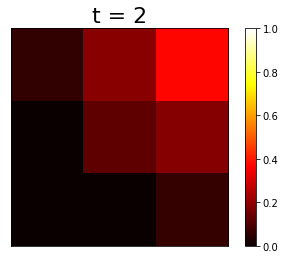

In [8]:
# pebble_multirun_histogram.py

import random
import numpy as np
import matplotlib.pyplot as plt

xvec = {1:3, 2:2, 3:1, 4:3, 5:2, 6:1, 7:3, 8:2, 9:1} 
yvec = {1:1, 2:1, 3:1, 4:2, 5:2, 6:2, 7:3, 8:3, 9:3} 

neighbor = {1 : [2, 4, 1, 1], 2 : [3, 5, 1, 2], 3 : [3, 6, 2, 3],
            4 : [5, 7, 4, 1], 5 : [6, 8, 4, 2], 6 : [6, 9, 5, 3],
            7 : [8, 7, 7, 4], 8 : [9, 8, 7, 5], 9 : [9, 9, 8, 6]}

list_vec = []
run = 2
if run < 10:  run_str= '0' + str(run)
else: run_str = str(run)
for n_runs in range(100000): 
    pos = 9
    for iter in range(run):
        pos = neighbor[pos][ random.randint(0, 3)]
    list_vec.append(pos)

x = [xvec[k] for k in list_vec]
y = [yvec[k] for k in list_vec]

plt.xticks([])
plt.yticks([])
H, xedges, yedges = np.histogram2d(x, y, bins=(3, 3), 
           range=[[1,3],[1,3]], normed=True)
print (H)
H /= np.sum(H)
print (H)
extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]
plt.imshow(H, extent=extent, interpolation='nearest', vmin=0.0, vmax=1.0)
plt.set_cmap('hot')
plt.colorbar()
plt.title('t = '+str(run),fontsize=22)
plt.savefig('3x3_pebble_run_'+run_str+'.png')
plt.show()


# Exponential Convergence and the 3 x 3 Pebble Game

In order to compute the exact probabilities at all time steps we need to introduce a vector:
<p/>
$$ \pi_t \equiv \left ( \begin{matrix} \pi_0^t \\ \pi_1^t  \\ \pi_2^t \\ \dots  \\ \pi_8^t \end{matrix} \right ) $$
<p/>
which contains the probabilities to find the pebble at time $t$ for each site.
<p/>
The Monte Carlo Algorithm is nothing but a matrix; a transfer matrix of transaction probabilities $p(a\to b)$ for moving from the site $a$ to the site $b$.
<p/>
In the 3 x 3 pebble game the matrix is a 9x9 because there are 9 configurations:
<p/>
$$ \left [ \begin{matrix} p(0 \to 0) & p(0 \to 1) & \dots & p(0 \to 8) \\  p(1 \to 0) & p(1 \to 1) & \dots &  p(1 \to 8) \\ p(2 \to 0) & p(2 \to 1) & \cdots &  p(2 \to 8) \\ \dots & \dots & \dots & \dots \\ p(8 \to 0) & p(8 \to 1) & \cdots &  p(8 \to 8) \end{matrix} \right ] $$
<p/>
Given that each move has a 1/4 probability of moving up, down, left, or right, and given that moves off the grid are counted as a 1/4 probability of staying put, let's calculate the values of the grid:
<p/>
$$ \frac 1 4 \left [ \begin{matrix} 
2 & 1 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
1 & 1 & 1 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 1 & 2 & 0 & 0 & 1 & 0 & 0 & 0 \\
1 & 0 & 0 & 1 & 1 & 0 & 1 & 0 & 0 \\
0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 \\
0 & 0 & 1 & 0 & 1 & 1 & 0 & 0 & 1 \\
0 & 0 & 0 & 1 & 0 & 0 & 2 & 1 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 1 & 1 & 1 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 1 & 2 
\end{matrix} \right ] $$
<p/>
Realize that the probability vector at time $t+1$ is the dot product between the trasfer matrix and the probability vector at time $t$.
<p/>


In [9]:
# pebble_transfer.py
import numpy

neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]
transfer = numpy.zeros((9, 9))
for k in range(9):
    for neigh in range(4): 
        transfer[neighbor[k][neigh], k] += 0.25
        
#print(transfer)        
        
position = numpy.zeros(9)
position[8] = 1.0
for t in range(50):
    print("%2d" % t,'  ',["%0.5f" % i for i in position])
    position = numpy.dot(transfer, position)


 0    ['0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '1.00000']
 1    ['0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.25000', '0.00000', '0.25000', '0.50000']
 2    ['0.00000', '0.00000', '0.06250', '0.00000', '0.12500', '0.18750', '0.06250', '0.18750', '0.37500']
 3    ['0.00000', '0.04688', '0.07812', '0.04688', '0.09375', '0.18750', '0.07812', '0.18750', '0.28125']
 4    ['0.02344', '0.05469', '0.09766', '0.05469', '0.11719', '0.16016', '0.09766', '0.16016', '0.23438']
 5    ['0.03906', '0.07324', '0.10254', '0.07324', '0.10742', '0.15234', '0.10254', '0.15234', '0.19727']
 6    ['0.05615', '0.08057', '0.10767', '0.08057', '0.11279', '0.13989', '0.10767', '0.13989', '0.17480']
 7    ['0.06836', '0.08929', '0.10895', '0.08929', '0.11023', '0.13379', '0.10895', '0.13379', '0.15735']
 8    ['0.07883', '0.09421', '0.11024', '0.09421', '0.11154', '0.12758', '0.11024', '0.12758', '0.14557']
 9    ['0.08652', '0.09871', '0.11057', '0.098

The probability vector remains unchanged by the transfer matrix transformation after reaching equilibrium. Notice that the probability vector converges to 0.11111 for all entries after fewer than 50 iterations. This means that the equilibrium vector is an eigenvector of the transfer matrix with eigenvalue of 1. Since the transfer matrix is square and invertable, e.i dim = n, there are nine dimensions and therefore nine eigenvectors. The eigenvector with the eigenvalue 1 is the largest eigenvector. The second largest eigenvector has an eigenvalue of 0.75. Let's see what that one is good for.  

In [10]:
# pebble_transfer_eigen.py
import numpy
 
neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]
transfer = numpy.zeros((9, 9))
for k in range(9):
    for neigh in range(4): transfer[neighbor[k][neigh], k] += 0.25
eigenvalues, eigenvectors = numpy.linalg.eig(transfer)
print(eigenvalues)
  
# you may print the eigenvectors by uncommenting the following lines...
#for iter in range(9):
#    print (eigenvalues[iter])
#    for i in range(9):
#        print(eigenvectors[i][iter])



[-5.00000000e-01  1.00000000e+00  5.00000000e-01  7.50000000e-01
  7.50000000e-01 -2.13981377e-16  8.30400017e-17  2.50000000e-01
  2.50000000e-01]


Consider again the output of pebbel_transfer.py where we find the probability to reach any site starting from the upper right corner. Now subtract the equilibrium vector from each entry and take the absolute value. The output is the difference between the value of the probability vector and the equilibrium vectors. Within less than 50 iterations, the output will consistantly be the zero vector. Now we put the otput for site 0 (zero) in the semilog scale. That is, we plot site zero's convergence to the equilibrium vector.

In [12]:
# pebble_transfer_sub.py
import numpy

neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]
transfer = numpy.zeros((9, 9))
for k in range(9):
    for neigh in range(4): transfer[neighbor[k][neigh], k] += 0.25
position = numpy.zeros(9)
position[8] = 1.0
for t in range(50):
    print( "%2d" % t,'  ',["%0.5f" % abs(i- 1.0 / 9.0) for i in position])
    position = numpy.dot(transfer, position)


 0    ['0.11111', '0.11111', '0.11111', '0.11111', '0.11111', '0.11111', '0.11111', '0.11111', '0.88889']
 1    ['0.11111', '0.11111', '0.11111', '0.11111', '0.11111', '0.13889', '0.11111', '0.13889', '0.38889']
 2    ['0.11111', '0.11111', '0.04861', '0.11111', '0.01389', '0.07639', '0.04861', '0.07639', '0.26389']
 3    ['0.11111', '0.06424', '0.03299', '0.06424', '0.01736', '0.07639', '0.03299', '0.07639', '0.17014']
 4    ['0.08767', '0.05642', '0.01345', '0.05642', '0.00608', '0.04905', '0.01345', '0.04905', '0.12326']
 5    ['0.07205', '0.03787', '0.00857', '0.03787', '0.00369', '0.04123', '0.00857', '0.04123', '0.08615']
 6    ['0.05496', '0.03054', '0.00345', '0.03054', '0.00168', '0.02878', '0.00345', '0.02878', '0.06369']
 7    ['0.04275', '0.02182', '0.00216', '0.02182', '0.00088', '0.02268', '0.00216', '0.02268', '0.04624']
 8    ['0.03228', '0.01690', '0.00087', '0.01690', '0.00043', '0.01647', '0.00087', '0.01647', '0.03446']
 9    ['0.02459', '0.01241', '0.00054', '0.012

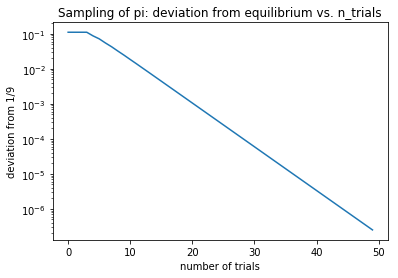

In [22]:
import numpy, random, math, pylab

neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]
transfer = numpy.zeros((9, 9))
for k in range(9):
    for neigh in range(4): 
        transfer[neighbor[k][neigh], k] += 0.25

position = numpy.zeros(9)
position[8] = 1.0
n_trials = []
site0 = []

for t in range(50):
    #print("%2d" % t,'  ',["%0.5f" % i for i in position])
    site0.append( abs(position[0] - 1/9) )
    n_trials.append(t)
    position = numpy.dot(transfer, position)


pylab.plot(n_trials, site0)
pylab.yscale('log')
pylab.xlabel('number of trials')
pylab.ylabel('deviation from 1/9')
pylab.title('Sampling of pi: deviation from equilibrium vs. n_trials')
pylab.savefig('sampling_deviation_line.png')
pylab.show()

The straight line indicates an exponential convergence to equilibrium. The slope of the line is $ 0.75^t$.
<p/>
$ 0.75^t = e^{-t \cdot | ln 0.75 |} $ or $ e^{-t/\tau} $ where $\tau$ = 3.476. This is the correlation time.
<p/>
After a few correlation times (4 or 5) the equilibrium is reached.
<p/>
To understand these observations we remark that the initial probability vectors can be written as the composite of the eigenvectors of the transfer matrix. The component associated with the eigenvalue 1 is conserved over time because 1^t = 1. The other components associated with the other eigenvaules decay exponentially. The slowest decay is given by the second largest eigenvalue.

## Irreducibility and aperiodicity in the Markov Chain

The evolution of Monte Carlo dynamics is determined by the decomposition of the probability vector at the initial time into the eigenvalues of the transfer matrix.
<p/>
$$ \pi^0 = 1 \times V_1 + \lambda_2 \times V_2 + ... $$
$$ \pi^t = 1 \times V_1 + \lambda_2^t \times V_2 + ... $$
<p/>

All eigenvalues have vaules less than or equal to 1. At large times the dynamics converge to the eigenvector with the largest eigenvector. We call this the probability vector of the equilibrium state or <em>steady state</em>. When does this picture apply? What are the rigorous mathematical conditions ensuring that it converges to a unique steady state at the time of convergence? 


<img style="float:right;max-width:392px;margin:1em 2em" src="double_pebble.png"/>
Consider a system with two copies of the three by three pebble game. This system is described by an 18 x 18 matrix.

## Week 1 Peer Reviewed Assignment

[0.4102474626660326, 0.3074829741971082, 0.20327641847231329, 0.15476059395071218, 0.09971579105526848, 0.0750331436145488, 0.04829561633999611, 0.03638185811487253, 0.026649230577082846]


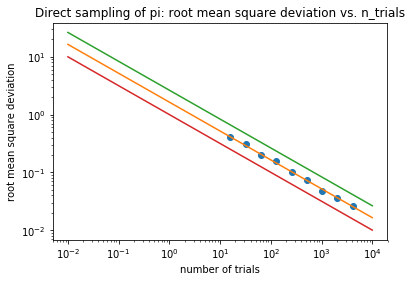

In [13]:
# direct sampling rms deviation

import random, math, pylab

def direct_pi(N):
    n_hits = 0
    for i in range(N):
        x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)
        if x ** 2 + y ** 2 < 1.0:
            n_hits += 1
    return n_hits

n_runs = 500
n_trials_list = []
sigmasqs = []
for poweroftwo in range(4, 13):
    n_trials = 2 ** poweroftwo
    sigmasq = 0.0
    for run in range(n_runs):
        pi_est = 4.0 * direct_pi(n_trials) / float(n_trials)
        sigmasq += (pi_est - math.pi) ** 2
    sigmasqs.append(math.sqrt(sigmasq/(n_runs)))
    n_trials_list.append(n_trials)

print(sigmasqs)    
    
pylab.plot(n_trials_list, sigmasqs, 'o')
pylab.plot([0.01, 10000.0], [1.642 / math.sqrt(0.01), 1.642 / math.sqrt(10000.0)])
pylab.plot([0.01, 10000.0], [2.642 / math.sqrt(0.01), 2.642 / math.sqrt(10000.0)])
pylab.plot([0.01, 10000.0], [1 / math.sqrt(0.01), 1 / math.sqrt(10000.0)])
pylab.xscale('log')
pylab.yscale('log')
pylab.xlabel('number of trials')
pylab.ylabel('root mean square deviation')
pylab.title('Direct sampling of pi: root mean square deviation vs. n_trials')
pylab.savefig('direct_sampling_rms_deviation_line.png')
pylab.show()

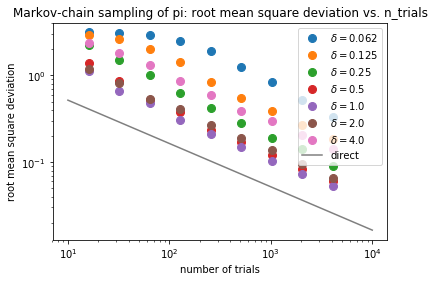

In [22]:
# Markov Chain rms sampling

import random, math, pylab

def markov_pi(N, delta):
    x, y = 1.0, 1.0
    n_hits = 0
    for i in range(N):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
            x, y = x + del_x, y + del_y
        if x**2 + y**2 < 1.0: n_hits += 1
    return n_hits

n_runs = 500
for delta in [0.062, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]:
    n_trials_list = []
    sigmas = []
    for poweroftwo in range(4, 13):
        n_trials = 2 ** poweroftwo
        sigma = 0.0
        for run in range(n_runs):
            pi_est = 4.0 * markov_pi(n_trials, delta) / float(n_trials)
            sigma += (pi_est - math.pi) ** 2
        sigmas.append(math.sqrt(sigma/(n_runs)))
        n_trials_list.append(n_trials)
    pylab.plot(n_trials_list, sigmas, 'o', ms = 8, label = '$\delta = $' + str(delta))

pylab.xscale('log')
pylab.yscale('log')
pylab.xlabel('number of trials')
pylab.ylabel('root mean square deviation')
pylab.plot([10,10000],[1.642 / math.sqrt(10.0), 1.642 / math.sqrt(10000.0)], label = 'direct')
pylab.title('Markov-chain sampling of pi: root mean square deviation vs. n_trials')
pylab.legend(loc='upper right')
pylab.savefig('markov_sampling_rms_deviation.png')
pylab.show()

In [50]:
import random, math
n_trials = 400000
n_hits = 0
var = 0.0
Obs1 = 0.0
Obs2 = 0.0
for iter in range(n_trials):
    x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)
    Obs = 0.0
    if x**2 + y**2 < 1.0:
        n_hits += 1
        Obs = 4.0
        Obs1 += 4.0
        Obs2 += 16.0
    var += (Obs - math.pi)**2
print (4.0 * n_hits / float(n_trials), math.sqrt(var / n_trials))
print (Obs1/n_trials, Obs2/n_trials, Obs2/n_trials - (Obs1/n_trials)**2, math.sqrt(Obs2/n_trials - (Obs1/n_trials)**2))


3.1372 1.6452341643089723
3.1372 12.5488 2.7067761600000004 1.6452283002671697


3.1492080688476562 mean value, estimate of pi
3.1492080688476562 mean value, estimate of pi
3.1492080688476562 mean value, estimate of pi
3.1492080688476562 mean value, estimate of pi
3.1492080688476562 mean value, estimate of pi
3.1492080688476562 mean value, estimate of pi
3.1492080688476562 mean value, estimate of pi
3.1492080688476562 mean value, estimate of pi
3.1492080688476562 mean value, estimate of pi
3.1492080688476562 mean value, estimate of pi
3.1492080688476562 mean value, estimate of pi
3.1492080688476562 mean value, estimate of pi
3.1492080688476562 mean value, estimate of pi
3.1492080688476562 mean value, estimate of pi
3.1492080688476562 mean value, estimate of pi
3.1492080688476562 mean value, estimate of pi
3.1492080688476562 mean value, estimate of pi
3.1492080688476562 mean value, estimate of pi
3.1492080688476562 mean value, estimate of pi
3.1492080688476562 mean value, estimate of pi


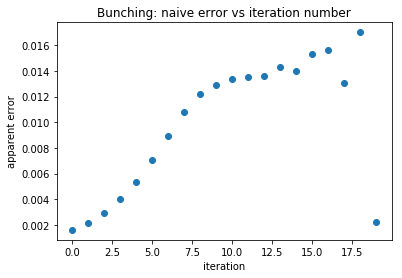

In [53]:
# bunching

import random, pylab, math

def markov_pi_all_data(N, delta):
    x, y = 1.0, 1.0
    data = []
    for i in range(N):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
            x, y = x + del_x, y + del_y
        if x ** 2 + y ** 2 < 1.0:
            data.append(4.0)
        else:
            data.append(0.0)
    return data

poweroftwo = 20
n_trials = 2 ** poweroftwo
delta = 0.1
data = markov_pi_all_data(n_trials, delta)
errors  = []
bunches = []
for i in range(poweroftwo):
    new_data = []
    mean = 0.0
    mean_sq = 0.0
    N = len(data)
    while data != []:
        x = data.pop()
        y = data.pop()
        mean += x + y
        mean_sq += x ** 2 + y ** 2
        new_data.append((x + y) / 2.0 )
    errors.append(math.sqrt(mean_sq / N - (mean / N) ** 2) / math.sqrt(N))
    bunches.append(i)
    data = new_data[:]
    print (mean / float(N), 'mean value, estimate of pi')
pylab.plot(bunches, errors, 'o')
pylab.xlabel('iteration')
pylab.ylabel('apparent error')
pylab.title('Bunching: naive error vs iteration number')
pylab.savefig('apparent_error_bunching.png')
pylab.show()